In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Load the dataset
# Replace with the actual path to your CSV file
df = pd.read_csv("dataset_mf2.csv")

In [90]:
#Remove rows with missing values
df.dropna(axis=0,inplace=True)

In [91]:
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [76]:
summary_stats=df.describe()
print(summary_stats)

        category_id         views         likes      dislikes  comment_count
count  36791.000000  3.679100e+04  3.679100e+04  3.679100e+04   36791.000000
mean      21.552173  1.071490e+06  2.745069e+04  1.685363e+03    2714.022043
std        6.586716  3.207149e+06  9.783129e+04  1.619732e+04   14978.114328
min        1.000000  4.024000e+03  0.000000e+00  0.000000e+00       0.000000
25%       23.000000  1.256040e+05  8.790000e+02  1.090000e+02      83.000000
50%       24.000000  3.078360e+05  3.126000e+03  3.310000e+02     336.000000
75%       24.000000  8.066315e+05  1.409500e+04  1.032000e+03    1314.500000
max       43.000000  1.254322e+08  2.912710e+06  1.545017e+06  827755.000000


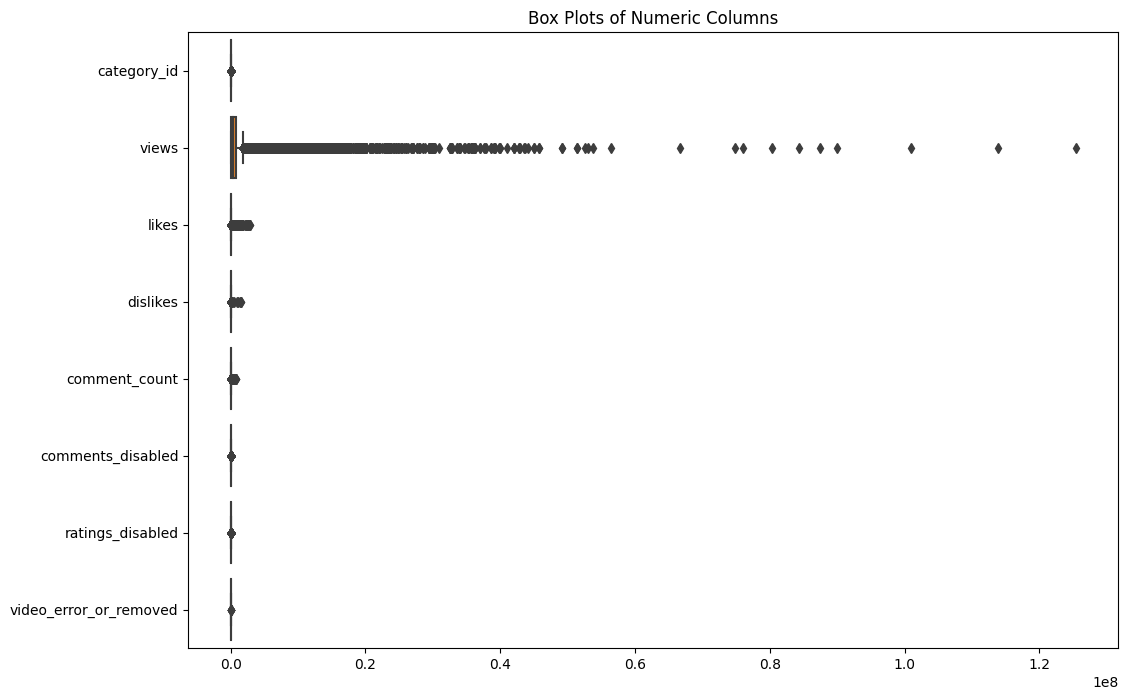

In [77]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.title('Box Plots of Numeric Columns')
plt.show()

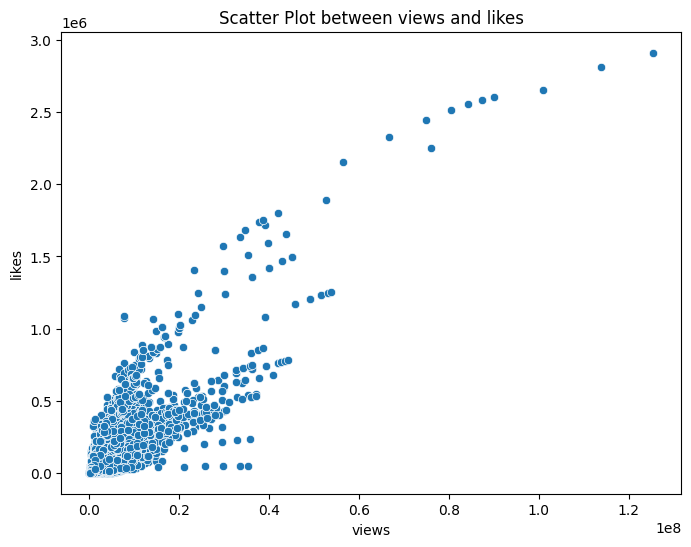

In [78]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='views', y='likes', data=df)
plt.title('Scatter Plot between views and likes')
plt.show()

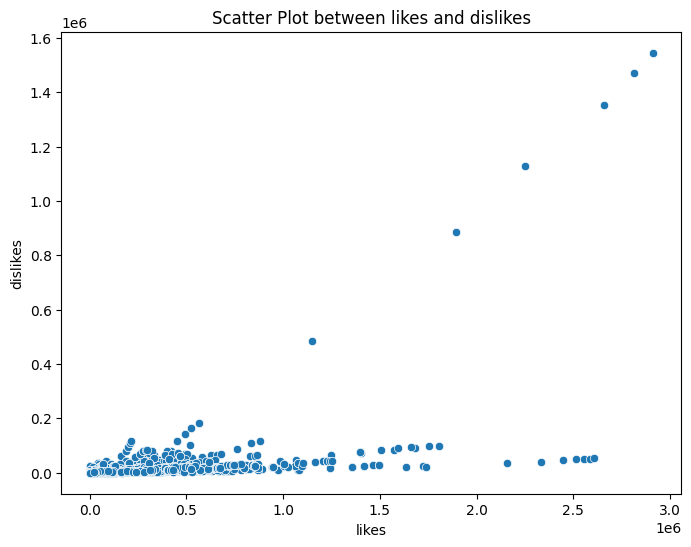

In [79]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='likes', y='dislikes', data=df)
plt.title('Scatter Plot between likes and dislikes')
plt.show()

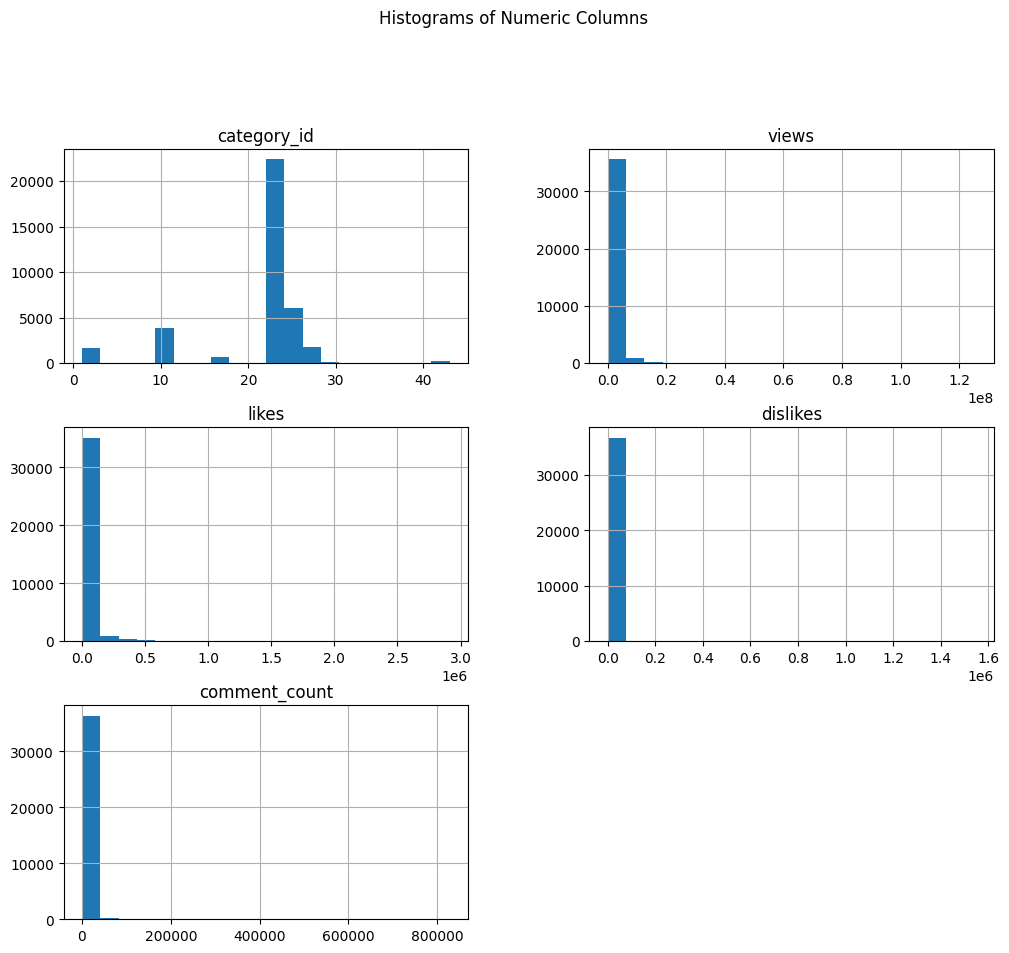

In [80]:
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Numeric Columns', y=1.02)
plt.show()

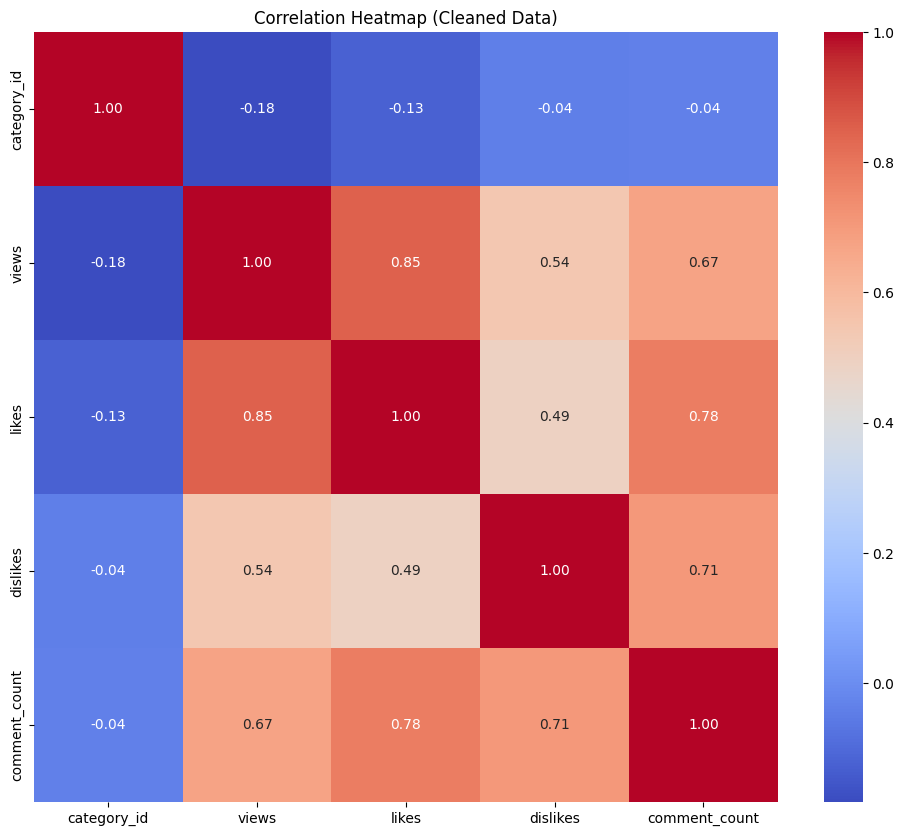

In [81]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
df = df[df['likes'].apply(lambda x: str(x).isnumeric())]

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Cleaned Data)')
plt.show()

In [84]:
import scipy.stats as stats

correlation = df['likes'].corr(df['views'])
correlation,p_value=stats.pearsonr(df['likes'],df['views'])

alpha=0.05
print("Correlation coefficient is : ",correlation)

if p_value <alpha:
      print("The correlation is statistically significant")
      if correlation >0:
         print("There is positive correlation between likes and views.")
      else:
         print("There is negatrive correlation between likes and views.")
else:
      print("The correlation is not statistically significant")

# Check the strength of correlation
if abs(correlation) > alpha :
    print('The correlation is considered strong.')
else:
    print('The correlation is considered weak.')

Correlation coefficient is :  0.8500731157518308
The correlation is statistically significant
There is positive correlation between likes and views.
The correlation is considered strong.


In [88]:
# Calculate the differences
df['difference'] = df['likes'] - df['dislikes']

# Count the number of rows with differences greater than 0 and less than 0
greater_than_zero_count = (df['difference'] > 0).sum()
less_than_zero_count = (df['difference'] < 0).sum()

# Make an if-else hypothesis based on the counts
if greater_than_zero_count > less_than_zero_count:
    hypothesis_result = "Likes are significantly more than dislikes."
else:
    hypothesis_result = "Likes are not significantly more than dislikes."

# Print the results
print("Total rows with likes more than dislikes :", greater_than_zero_count)
print("Total rows with dislikes more than likes :", less_than_zero_count)
print("Hypothesis Result:", hypothesis_result)

Total rows with likes more than dislikes : 35391
Total rows with dislikes more than likes : 637
Hypothesis Result: Likes are significantly more than dislikes.


In [96]:
import pandas as pd
import numpy as np

data = df['views']

# Calculate IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Identify potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
potential_outliers = df[(df['views'] < lower_bound) | (df['views'] > upper_bound)]

# Perform a hypothesis test
alpha = 0.05
if len(potential_outliers) > 0:
    print("Reject the null hypothesis. There are potential outliers in the 'views' column.")
else:
    print("Fail to reject the null hypothesis. There are no potential outliers in the 'views' column.")


Reject the null hypothesis. There are potential outliers in the 'views' column.
